[Visualizing and Solving with ARC 2025](https://www.kaggle.com/code/sudipde25/visualizing-and-solving-with-arc-2025)

In [1]:
import os
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

from tqdm.auto import tqdm

In [2]:
import matplotlib
from concurrent.futures import ThreadPoolExecutor

In [3]:
class ARCDataset:
    def __init__(self, base='../arc-prize-2025'):
        path = Path(base)
        self.data = {
            k: self._load(path / f) for k, f in {
                'train_ch': 'arc-agi_training_challenges.json',
                'train_sol': 'arc-agi_training_solutions.json',
                'eval_ch': 'arc-agi_evaluation_challenges.json',
                'eval_sol': 'arc-agi_evaluation_solutions.json'
            }.items()
        }

    def _load(self, file):
        return json.load(open(file)) if file.exists() else {}

    def get_split(self, split='train'):
        if split == 'train':
            return self.data['train_ch'], self.data['train_sol']
        elif split == 'eval':
            return self.data['eval_ch'], self.data['eval_sol']
        else:
            raise ValueError("Invalid split")

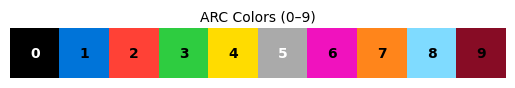

In [4]:
arc_colors = ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
              '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25']
cmap = ListedColormap(arc_colors)
norm = BoundaryNorm(range(11), cmap.N)

def plot_one(ax, mat, title=""):
    ax.imshow(mat, cmap=cmap, norm=norm)
    ax.set_title(title, fontsize=8)
    ax.axis('off')

plt.imshow([range(10)], cmap=cmap)
for i in range(10):
    plt.text(i, 0, str(i), ha='center', va='center',
             fontsize=10, fontweight='bold',
             color='white' if i in [0, 5] else 'black')
plt.axis('off')
plt.title("ARC Colors (0–9)", fontsize=10)
plt.show()

In [5]:
def visualize_range(challenges, solutions, start=0, end=30):
    keys = list(challenges.keys())[start:end]

    for i, task_id in enumerate(keys, start=start):
        print(f"#{i}, Task ID: {task_id}") 
        
        task = challenges[task_id]
        solution = solutions.get(task_id, [None])[0]
        if solution is None:
            continue

        train = task.get('train', [])
        test = task.get('test', [])
        total = len(train) + (1 if test else 0)

        fig, axs = plt.subplots(2, total, figsize=(2 * total, 4))
        axs = np.atleast_2d(axs)

        fig.suptitle(f"Task: {task_id}", fontsize=12)

        for j, pair in enumerate(train):
            plot_one(axs[0, j], pair['input'], f"Train {j} Input")
            plot_one(axs[1, j], pair['output'], f"Train {j} Output")

        if test:
            plot_one(axs[0, len(train)], test[0]['input'], "Test Input")
            plot_one(axs[1, len(train)], solution, "Test Output")

        plt.tight_layout()
        plt.show()
        plt.close(fig)

ds = ARCDataset()
training_challenges, training_solutions = ds.get_split('train')
evaluation_challenges, evaluation_solutions = ds.get_split('eval')

In [6]:
def save_range_as_png(challenges, solutions, start=0, end=30, output_dir="output_images"):
    os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

    keys = list(challenges.keys())[start:end]

    for i, task_id in tqdm(enumerate(keys, start=start), total=len(keys), leave=False):
        # print(f"#{i}, Task ID: {task_id}") 
        
        task = challenges[task_id]
        solution = solutions.get(task_id, [None])[0]
        if solution is None:
            continue

        train = task.get('train', [])
        test = task.get('test', [])
        total = len(train) + (1 if test else 0)

        fig, axs = plt.subplots(2, total, figsize=(2 * total, 4))
        axs = np.atleast_2d(axs)

        fig.suptitle(f"Task: {task_id}", fontsize=12)

        for j, pair in enumerate(train):
            plot_one(axs[0, j], pair['input'], f"Train {j} Input")
            plot_one(axs[1, j], pair['output'], f"Train {j} Output")

        if test:
            plot_one(axs[0, len(train)], test[0]['input'], "Test Input")
            plot_one(axs[1, len(train)], solution, "Test Output")

        # plt.tight_layout()
        fig.subplots_adjust(wspace=0.1, hspace=0.1)

        # File name with 4-digit index
        filename = f"{i:04d}_{task_id}.png"
        save_path = os.path.join(output_dir, filename)
        plt.savefig(save_path, format="png")
        plt.close(fig)

In [7]:
# def save_one_figure(i, task_id, task, solution, output_dir, pbar=None):
#     if solution is None:
#         if pbar:
#             pbar.update(1)
#         return

#     train = task.get('train', [])
#     test = task.get('test', [])
#     total = len(train) + (1 if test else 0)

#     fig, axs = plt.subplots(2, total, figsize=(2 * total, 4))
#     axs = np.atleast_2d(axs)

#     fig.suptitle(f"Task: {task_id}", fontsize=12)

#     for j, pair in enumerate(train):
#         plot_one(axs[0, j], pair['input'], f"Train {j} Input")
#         plot_one(axs[1, j], pair['output'], f"Train {j} Output")

#     if test:
#         plot_one(axs[0, len(train)], test[0]['input'], "Test Input")
#         plot_one(axs[1, len(train)], solution, "Test Output")

#     # fig.subplots_adjust(wspace=0.1, hspace=0.1)
#     plt.tight_layout()

#     filename = f"{i:04d}_{task_id}.png"
#     save_path = os.path.join(output_dir, filename)
#     plt.savefig(save_path, format="png")
#     plt.close(fig)

#     if pbar:
#         pbar.update(1)

# def save_range_as_png(challenges, solutions, start=0, end=30, output_dir="output_images", max_workers=12):
#     os.makedirs(output_dir, exist_ok=True)
#     keys = list(challenges.keys())[start:end]

#     with tqdm(total=len(keys), desc="Saving Images", leave=True) as pbar:
#         with ThreadPoolExecutor(max_workers=max_workers) as executor:
#             futures = [
#                 executor.submit(
#                     save_one_figure,
#                     i,
#                     task_id,
#                     challenges[task_id],
#                     solutions.get(task_id, [None])[0],
#                     output_dir,
#                     pbar
#                 )
#                 for i, task_id in enumerate(keys, start=start)
#             ]
#             for f in futures:
#                 f.result()

#99, Task ID: 1f642eb9


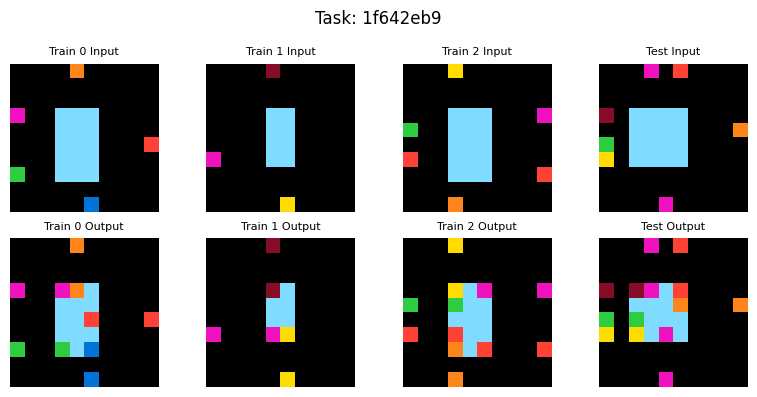

#199, Task ID: 363442ee


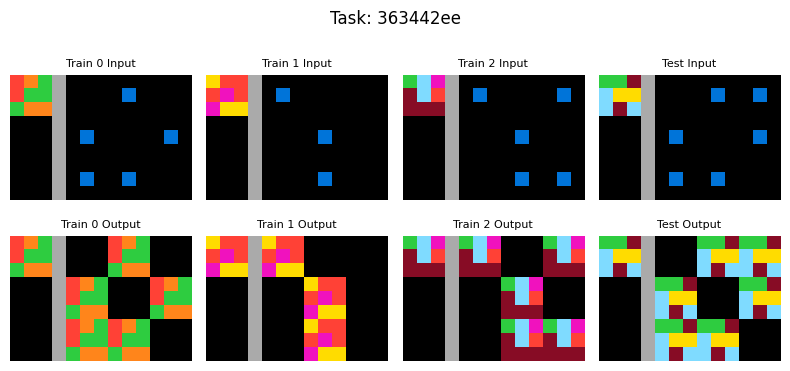

#299, Task ID: 5168d44c


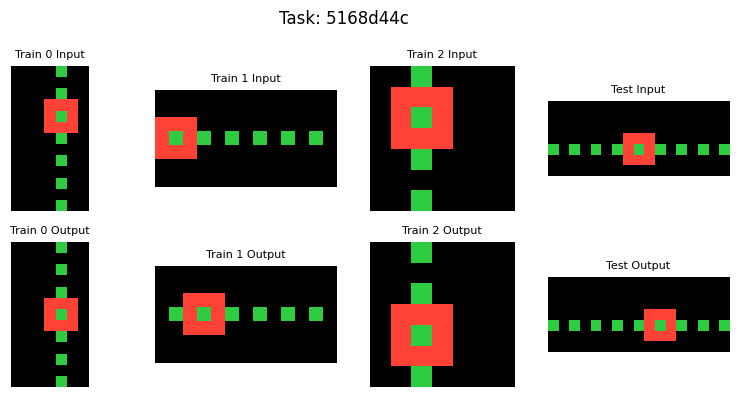

#399, Task ID: 6a1e5592


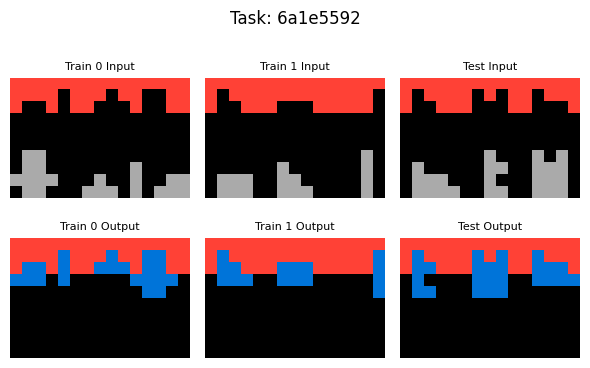

#499, Task ID: 8597cfd7


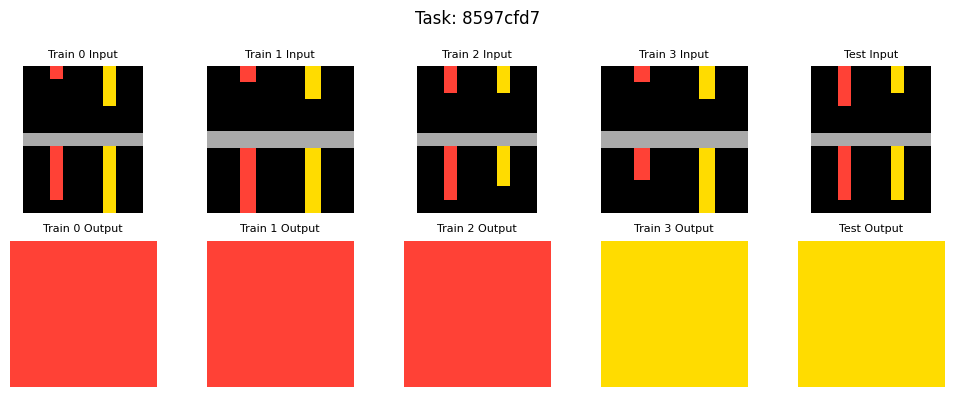

#599, Task ID: 9b5080bb


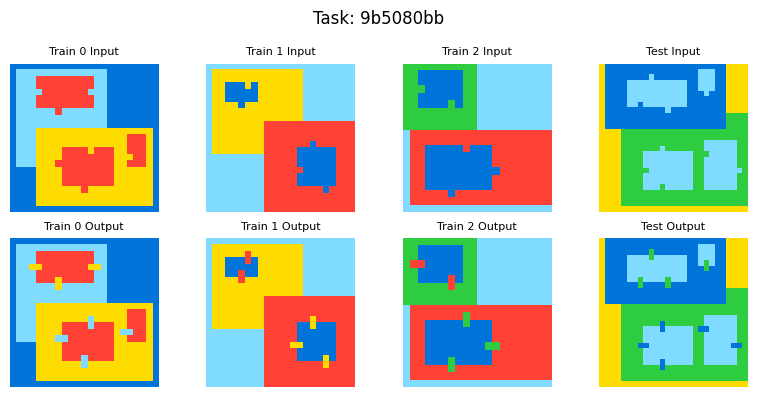

#699, Task ID: b527c5c6


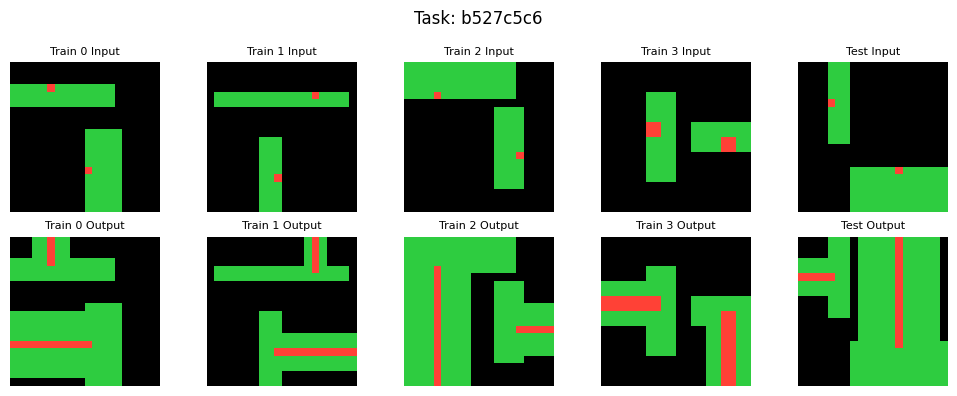

#799, Task ID: cfb2ce5a


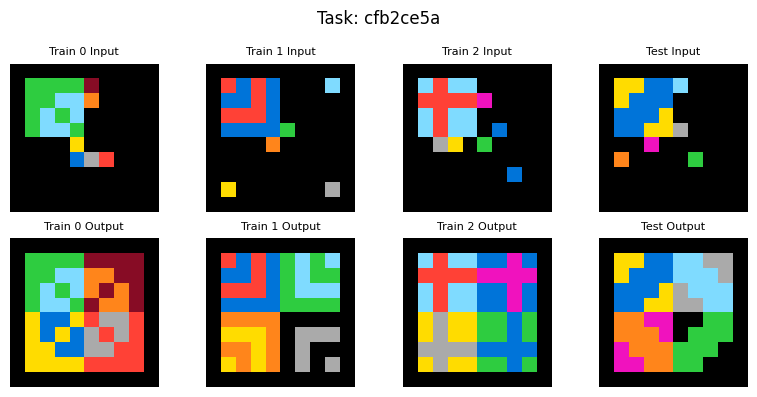

#899, Task ID: e6721834


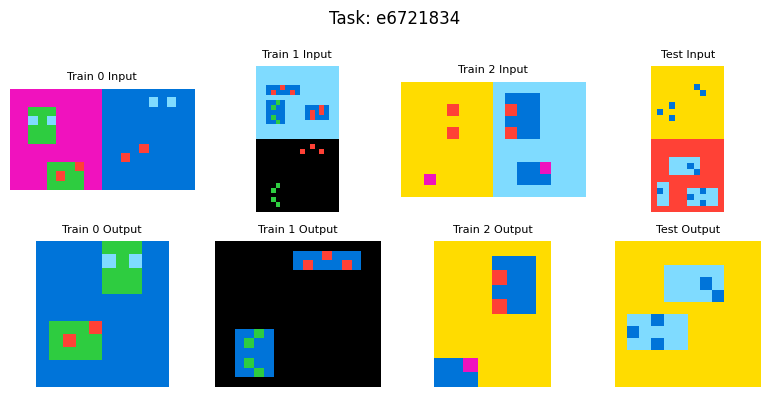

In [8]:
for i in range(0, 1000, 100):
    visualize_range(training_challenges, training_solutions, i-1, i)

#119, Task ID: fc7cae8d


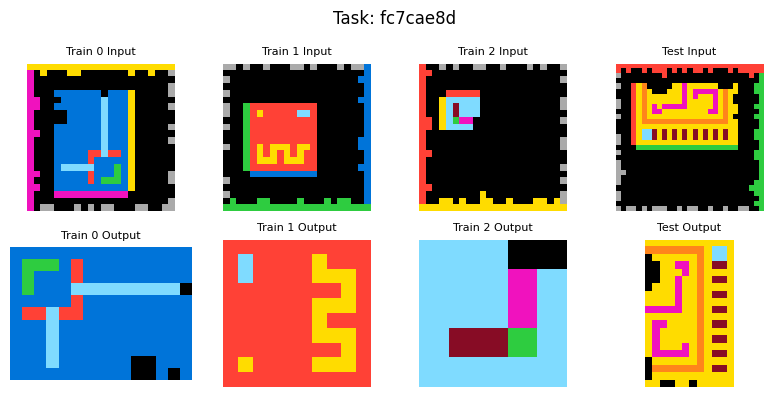

In [9]:
visualize_range(evaluation_challenges, evaluation_solutions, 119, 120)

In [10]:
save_range_as_png(training_challenges, training_solutions, 0, 1000, "train_images")
save_range_as_png(evaluation_challenges, evaluation_solutions, 0, 120, "eval_images")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]